<H1><U>PROJECT- SUICIDE CLUSTER DATA ANALYSIS</H1></U>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df = pd.read_csv('/Users/Lenovo/Desktop/who_suicide_statistics.csv')

<h2>Step 1: UNDERSTANDING DATASET </h2>

In [3]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


<h2>Step 2: DATA CLEANING</h2>

In [7]:
# Checking for null values
df.isna()

,country,year,sex,age,suicides_no,population
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
43771,False,False,False,False,False,True
43772,False,False,False,False,False,True
43773,False,False,False,False,False,True
43774,False,False,False,False,False,True


In [8]:
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [9]:
df['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [10]:
df['country'].nunique()

141

In [11]:
df['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [12]:
df['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [13]:
new_data=df.groupby('age')


In [14]:
new_data.get_group('15-24 years')

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
6,Albania,1985,male,15-24 years,NaN,301400.0
12,Albania,1986,female,15-24 years,NaN,283900.0
18,Albania,1986,male,15-24 years,NaN,306700.0
24,Albania,1987,female,15-24 years,14.0,289700.0
...,...,...,...,...,...,...
43746,Virgin Islands (USA),2012,male,15-24 years,2.0,6663.0
43752,Virgin Islands (USA),2015,female,15-24 years,0.0,6675.0
43758,Virgin Islands (USA),2015,male,15-24 years,0.0,6933.0
43764,Zimbabwe,1990,female,15-24 years,124.0,NaN


In [15]:
df1=new_data.get_group('15-24 years')
df2=new_data.get_group('25-34 years')
df3=new_data.get_group('35-54 years')
df4=new_data.get_group('5-14 years')
df5=new_data.get_group('55-74 years')
df6=new_data.get_group('75+ years')

In [16]:
new_data.mean()

,year,suicides_no,population
age,,,
15-24 years,1998.502467,142.238006,1.728157e+06
25-34 years,1998.502467,197.591474,1.658335e+06
35-54 years,1998.502467,418.408671,2.733426e+06
5-14 years,1998.502467,9.149133,1.709292e+06
55-74 years,1998.502467,283.015607,1.667884e+06
75+ years,1998.502467,109.489451,4.874521e+05


In [17]:
df1= df1.fillna({
                'suicides_no':int(df1['suicides_no'].mean()),
                'population':int(df1['population'].mean())                
        })
df2= df2.fillna({
            'suicides_no':int(df2['suicides_no'].mean()),
            'population':int(df2['population'].mean())
            
        })
df3= df3.fillna({
            'suicides_no':int(df3['suicides_no'].mean()),
            'population':int(df3['population'].mean())
        })
df4 = df4.fillna({
            'suicides_no':int(df4['suicides_no'].mean()),
            'population':int(df4['population'].mean())
        })
df5=  df5.fillna({
            'population':int(df5['population'].mean()),
            'suicides_no':int(df5['suicides_no'].mean())
        })
df6= df6.fillna({
            'population':int(df6['population'].mean()),
            'suicides_no':int(df6['suicides_no'].mean())
        })

In [18]:
new_data=pd.concat([df1,df2,df3,df4,df5,df6])
new_data=new_data.reset_index()

In [19]:
new_data

,index,country,year,sex,age,suicides_no,population
0,0,Albania,1985,female,15-24 years,142.0,277900.0
1,6,Albania,1985,male,15-24 years,142.0,301400.0
2,12,Albania,1986,female,15-24 years,142.0,283900.0
3,18,Albania,1986,male,15-24 years,142.0,306700.0
4,24,Albania,1987,female,15-24 years,14.0,289700.0
...,...,...,...,...,...,...,...
43771,43751,Virgin Islands (USA),2012,male,75+ years,0.0,2135.0
43772,43757,Virgin Islands (USA),2015,female,75+ years,0.0,3508.0
43773,43763,Virgin Islands (USA),2015,male,75+ years,0.0,2496.0
43774,43769,Zimbabwe,1990,female,75+ years,3.0,487452.0


In [20]:
del new_data['index']

In [21]:
new_data

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,142.0,277900.0
1,Albania,1985,male,15-24 years,142.0,301400.0
2,Albania,1986,female,15-24 years,142.0,283900.0
3,Albania,1986,male,15-24 years,142.0,306700.0
4,Albania,1987,female,15-24 years,14.0,289700.0
...,...,...,...,...,...,...
43771,Virgin Islands (USA),2012,male,75+ years,0.0,2135.0
43772,Virgin Islands (USA),2015,female,75+ years,0.0,3508.0
43773,Virgin Islands (USA),2015,male,75+ years,0.0,2496.0
43774,Zimbabwe,1990,female,75+ years,3.0,487452.0


In [22]:
# new_data is the clean dataframe

<H1>Step 3: EXPLORATORY DATA ANALYSIS </H1>

<h2>Ques: Which year has the most Suicides? Which year has the least Suicides?</h2>

In [23]:
    def find_minmax(x):

        max=new_data[x].idxmax()
        high=pd.DataFrame(new_data.loc[max,:])

        min=new_data[x].idxmin()
        low=pd.DataFrame(new_data.loc[min,:])

        print('The year in which maximum '+ x + ' happened:',new_data['year'][max])
        print('The year in which minimum '+ x + ' happened:',new_data['year'][min])

        return pd.concat([high,low], axis=1)

find_minmax('suicides_no')

The year in which maximum suicides_no happened: 1994
The year in which minimum suicides_no happened: 2005


,20113,40
country,Russian Federation,Albania
year,1994,2005
sex,male,female
age,35-54 years,15-24 years
suicides_no,22338.0,0.0
population,19044200.0,281922.0


<h2>Ques: Which country has the most Suicides? Which country has the least Suicides? </h2>

In [24]:
def find_minmax(x):

        max=new_data[x].idxmax()
        high=pd.DataFrame(new_data.loc[max,:])

        min=new_data[x].idxmin()
        low=pd.DataFrame(new_data.loc[min,:])

        print('The country in which maximum '+ x + ' happened:',new_data['country'][max])
        print('The country in which minimum '+ x + ' happened:',new_data['country'][min])

        return pd.concat([high,low], axis=1)

find_minmax('suicides_no')

The country in which maximum suicides_no happened: Russian Federation
The country in which minimum suicides_no happened: Albania


,20113,40
country,Russian Federation,Albania
year,1994,2005
sex,male,female
age,35-54 years,15-24 years
suicides_no,22338.0,0.0
population,19044200.0,281922.0


### Adding a new column of suicide per 100,000 population size ratio

In [26]:
new_df=new_data.copy() #craeting a copy of new_data dataframe

In [27]:
new_data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,142.0,277900.0
1,Albania,1985,male,15-24 years,142.0,301400.0
2,Albania,1986,female,15-24 years,142.0,283900.0
3,Albania,1986,male,15-24 years,142.0,306700.0
4,Albania,1987,female,15-24 years,14.0,289700.0


In [28]:
new_df['suicide_per_100k']=new_df['suicides_no']/100000
new_df.head()

,country,year,sex,age,suicides_no,population,suicide_per_100k
0,Albania,1985,female,15-24 years,142.0,277900.0,0.00142
1,Albania,1985,male,15-24 years,142.0,301400.0,0.00142
2,Albania,1986,female,15-24 years,142.0,283900.0,0.00142
3,Albania,1986,male,15-24 years,142.0,306700.0,0.00142
4,Albania,1987,female,15-24 years,14.0,289700.0,0.00014


<h2>Ques: Which age groups more inclined to suicide?</h2>

In [29]:
data=new_df.groupby('age')

In [30]:
dt=data.mean()
dt

,year,suicides_no,population,suicide_per_100k
age,,,,
15-24 years,1998.502467,142.225740,1.728157e+06,0.001422
25-34 years,1998.502467,197.560992,1.658335e+06,0.001976
35-54 years,1998.502467,418.387610,2.733426e+06,0.004184
5-14 years,1998.502467,9.141447,1.709292e+06,0.000091
55-74 years,1998.502467,283.014803,1.667884e+06,0.002830
75+ years,1998.502467,109.464227,4.874521e+05,0.001095


In [31]:
print('The vulnerable age group is: ',dt['suicides_no'].idxmax())

The vulnerable age group is:  35-54 years


<h2>Ques: What is the relationship between the gender and the number of suicides?</h2>

In [32]:
data_gender=new_df.groupby('sex')

In [33]:
dg=data_gender.mean()
dg

,year,suicides_no,population,suicide_per_100k
sex,,,,
female,1998.502467,96.855629,1.698336e+06,0.000969
male,1998.502467,289.742644,1.629846e+06,0.002897


In [34]:
print('The '+ dg['suicides_no'].idxmax()+'s are most affected.')

The males are most affected.


In [35]:
new_df.head()

,country,year,sex,age,suicides_no,population,suicide_per_100k
0,Albania,1985,female,15-24 years,142.0,277900.0,0.00142
1,Albania,1985,male,15-24 years,142.0,301400.0,0.00142
2,Albania,1986,female,15-24 years,142.0,283900.0,0.00142
3,Albania,1986,male,15-24 years,142.0,306700.0,0.00142
4,Albania,1987,female,15-24 years,14.0,289700.0,0.00014


<H1>Step 4: DATA VISUALIZATION</H1>

In [36]:
corr_matrix = new_df.corr()
print(corr_matrix)

                      year  suicides_no  population  suicide_per_100k
year              1.000000    -0.011343    0.025506         -0.011343
suicides_no      -0.011343     1.000000    0.597971          1.000000
population        0.025506     0.597971    1.000000          0.597971
suicide_per_100k -0.011343     1.000000    0.597971          1.000000


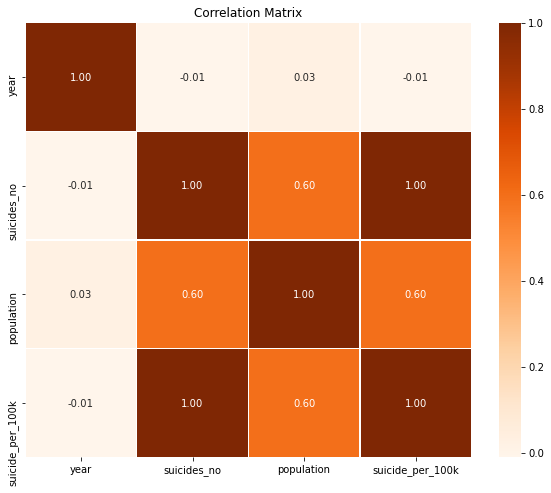

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

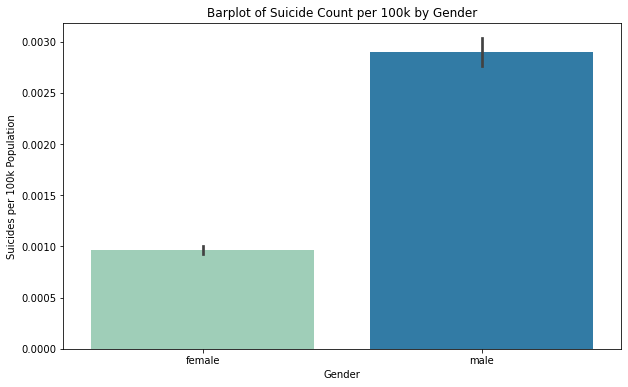

In [38]:
# Set the size of the plot
plt.figure(figsize=(10, 6))  

# Create a barplot
sns.barplot(data=new_df, x="sex", y="suicide_per_100k", palette="YlGnBu")

# Set plot title and labels
plt.title('Barplot of Suicide Count per 100k by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicides per 100k Population')

# Display the plot
plt.show()

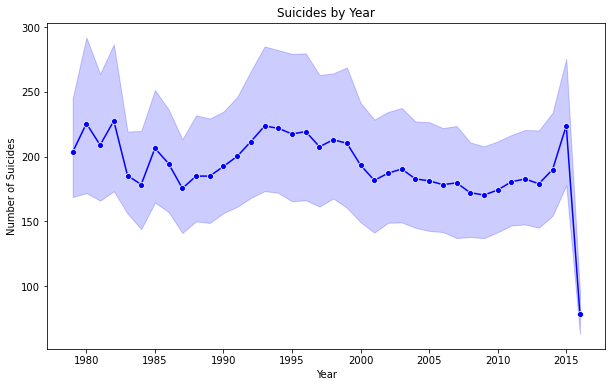

In [39]:
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create a line plot
sns.lineplot(data=new_df, x="year", y="suicides_no", marker="o", color="blue")

# Set plot title and labels
plt.title('Suicides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')

# Display the plot
plt.show()

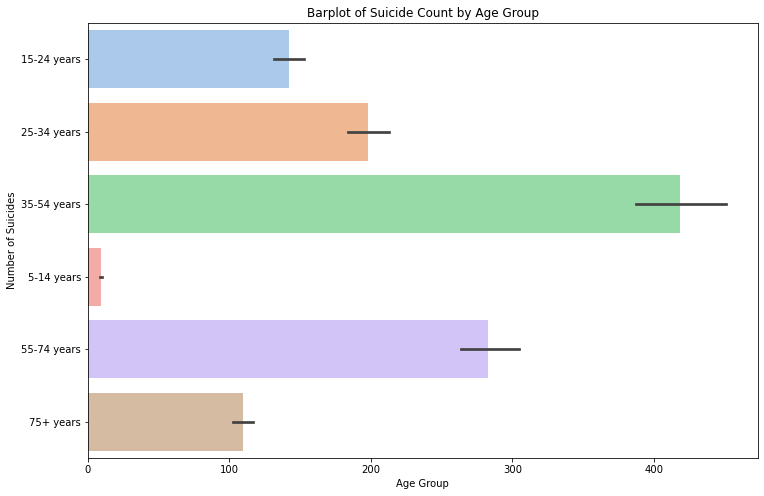

In [40]:
# Set the size of the plot
plt.figure(figsize=(12, 8)) 

# Create a boxplot
sns.barplot(data=new_df, y="age", x="suicides_no", palette="pastel", orient='h')

# Set plot title and labels
plt.title('Barplot of Suicide Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')

# Display the plot
plt.show()

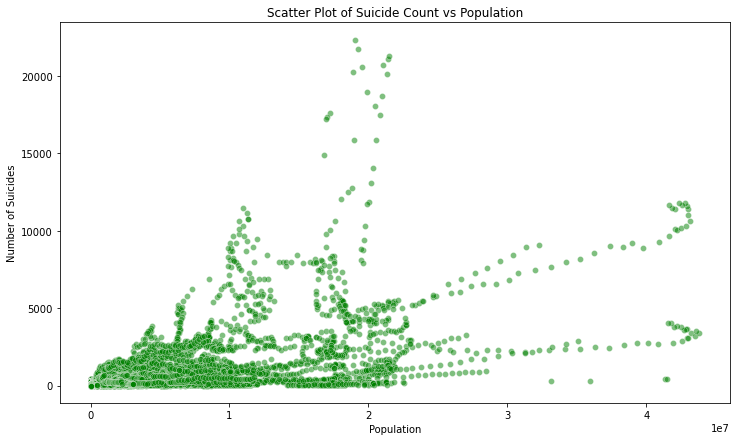

In [41]:
plt.figure(figsize=(12, 7))  # Set the size of the plot

# Create a scatter plot
sns.scatterplot(data=new_df, x="population", y="suicides_no", color="Green", alpha=0.5)

# Set plot title and labels
plt.title('Scatter Plot of Suicide Count vs Population')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')

# Display the plot
plt.show()

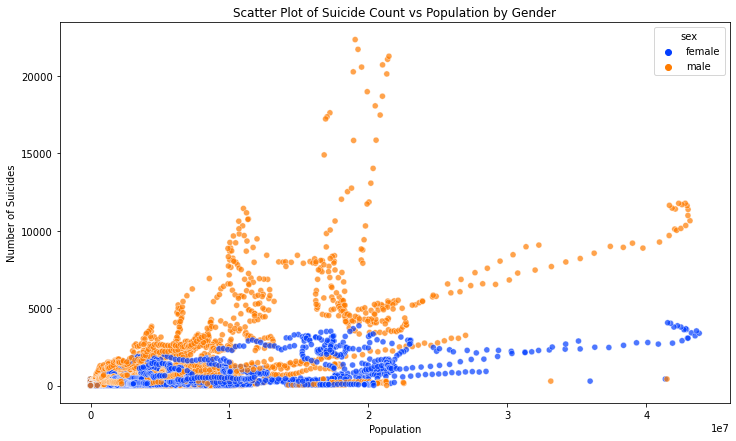

In [42]:
# Set the size of the plot
plt.figure(figsize=(12, 7))

# Creating Scatterplot
sns.scatterplot(data=new_df, x="population", y="suicides_no", hue="sex", palette="bright", alpha=0.7)

# Set plot title and labels
plt.title('Scatter Plot of Suicide Count vs Population by Gender')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')

# Display the plot
plt.show()

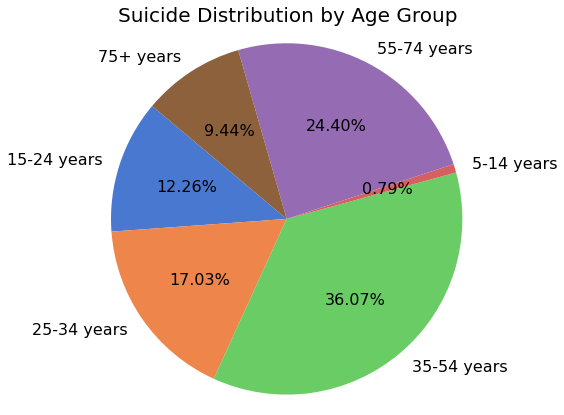

In [43]:
# Set the size of the plot
plt.figure(figsize=(7,7))

# Calculate the sum of suicide counts for each age group
age_suicide_counts = new_df.groupby('age')['suicides_no'].sum()

# Create a pie chart
plt.pie(age_suicide_counts, labels=age_suicide_counts.index, autopct='%.2f%%', startangle=140, colors=sns.color_palette('muted'), textprops={'fontsize': 16})
# Add a title
plt.title('Suicide Distribution by Age Group', fontdict = {'fontsize' : 20})

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

<H1>Step 5: SUICIDE DATA INSIGHTS DASHBOARD</H1>

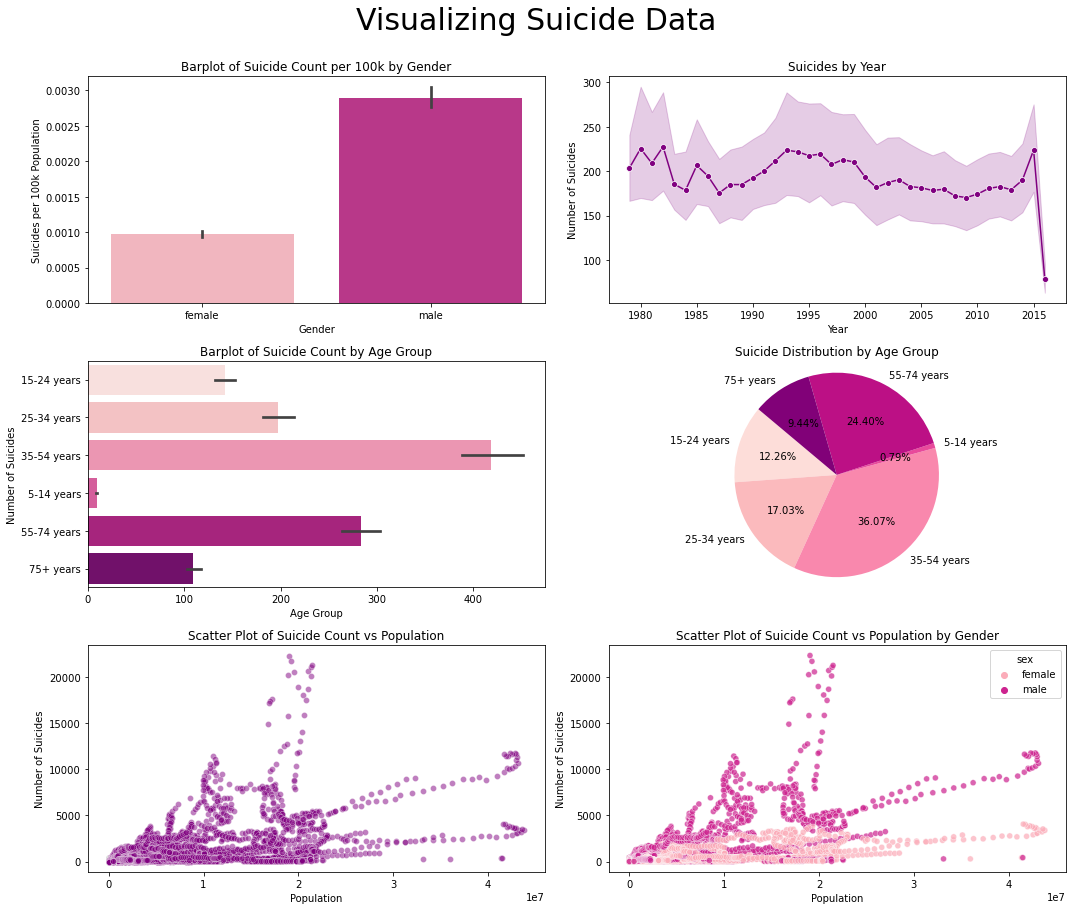

In [44]:
dashboard_title='Visualizing Suicide Data'

#Set the PLOT SIZE
plt.figure(figsize=(15, 12))

# Barplot of Suicide Count per 100k by Gender
plt.subplot(3,2,1) # Set the location of Subplot
sns.barplot(data=new_df, x="sex", y="suicide_per_100k", palette="RdPu")
plt.title('Barplot of Suicide Count per 100k by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicides per 100k Population')

# Lineplot of Suicides by Year
plt.subplot(3,2,2)
sns.lineplot(data=new_df, x="year", y="suicides_no", marker="o", color="purple")
plt.title('Suicides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')

# Barplot of Suicide Count by Age Group
plt.subplot(3,2,3)
sns.barplot(data=new_df, y="age", x="suicides_no", palette="RdPu", orient='h')
plt.title('Barplot of Suicide Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')

# Pie Chart of Suicide Distribution by Age Group
plt.subplot(3,2,4)
age_suicide_counts = new_df.groupby('age')['suicides_no'].sum()
plt.pie(age_suicide_counts, labels=age_suicide_counts.index, autopct='%.2f%%', startangle=140, colors=sns.color_palette('RdPu'))
plt.title('Suicide Distribution by Age Group')
plt.axis('equal')

# Scatter Plot of Suicide Count vs Population
plt.subplot(3,2,5)
sns.scatterplot(data=new_df, x="population", y="suicides_no", color="purple", alpha=0.5)
plt.title('Scatter Plot of Suicide Count vs Population')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')

# Scatter Plot of Suicide Count vs Population by Gender
plt.subplot(3,2,6)
sns.scatterplot(data=new_df, x="population", y="suicides_no", hue="sex", palette="RdPu", alpha=0.7)
plt.title('Scatter Plot of Suicide Count vs Population by Gender')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')


# Adjust spacing between plots
plt.tight_layout()

# Add the dashboard title
plt.suptitle(dashboard_title, fontsize=30, y=1.05)

# Display the dashboard
plt.show()


# ---------------------------------------------------------------------------------------------------------------